ASSIGNMENT - 3: Data preprocessing on Titanic dataset 
NAME: rishitha.k 

Data preprocessing steps invovled 
1.import the necessary libaries
2.import the datset
3.handling null values
4.detect the outlier (out of range)
5.seperate dependent and independent varaibles
6.encoding
7.feature scaling
8.splitting into training and testing set

# 1.Import the necessary Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing the dataset

In [50]:
df = pd.read_csv("Titanic-Dataset.csv")

In [51]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.shape

(891, 12)

In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


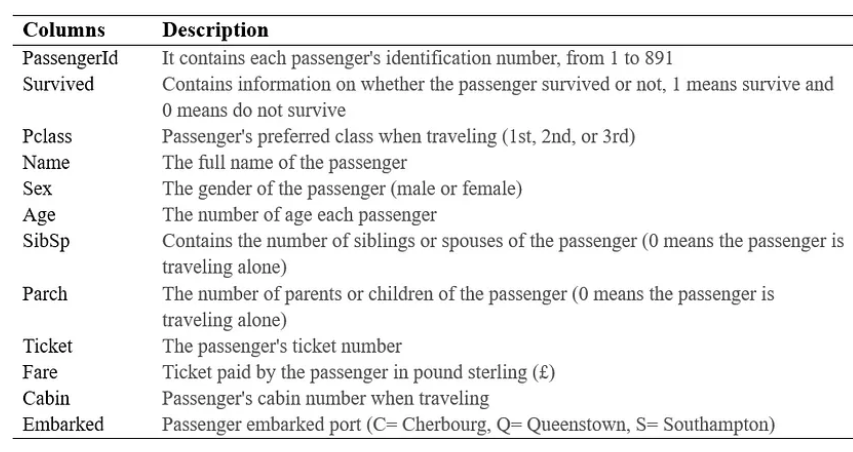









In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 3.Handling null values

In [56]:
df.isnull().any()  #finding null values in dataset


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [57]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [58]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
df['Age'] = df['Age'].fillna(df['Age'].mean()) #replace null values with mean for numerical data

In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:

#df=df.drop(['Cabin'],axis=1) # as we are having more null values we will drop 

In [62]:
df["Cabin"].fillna(df["Cabin"].mode()[0],inplace=True)

In [63]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [64]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked        True
dtype: bool

In [65]:
df.shape


(891, 12)

In [66]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [67]:
df.isnull().any() 

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [23]:
df.shape

(891, 12)

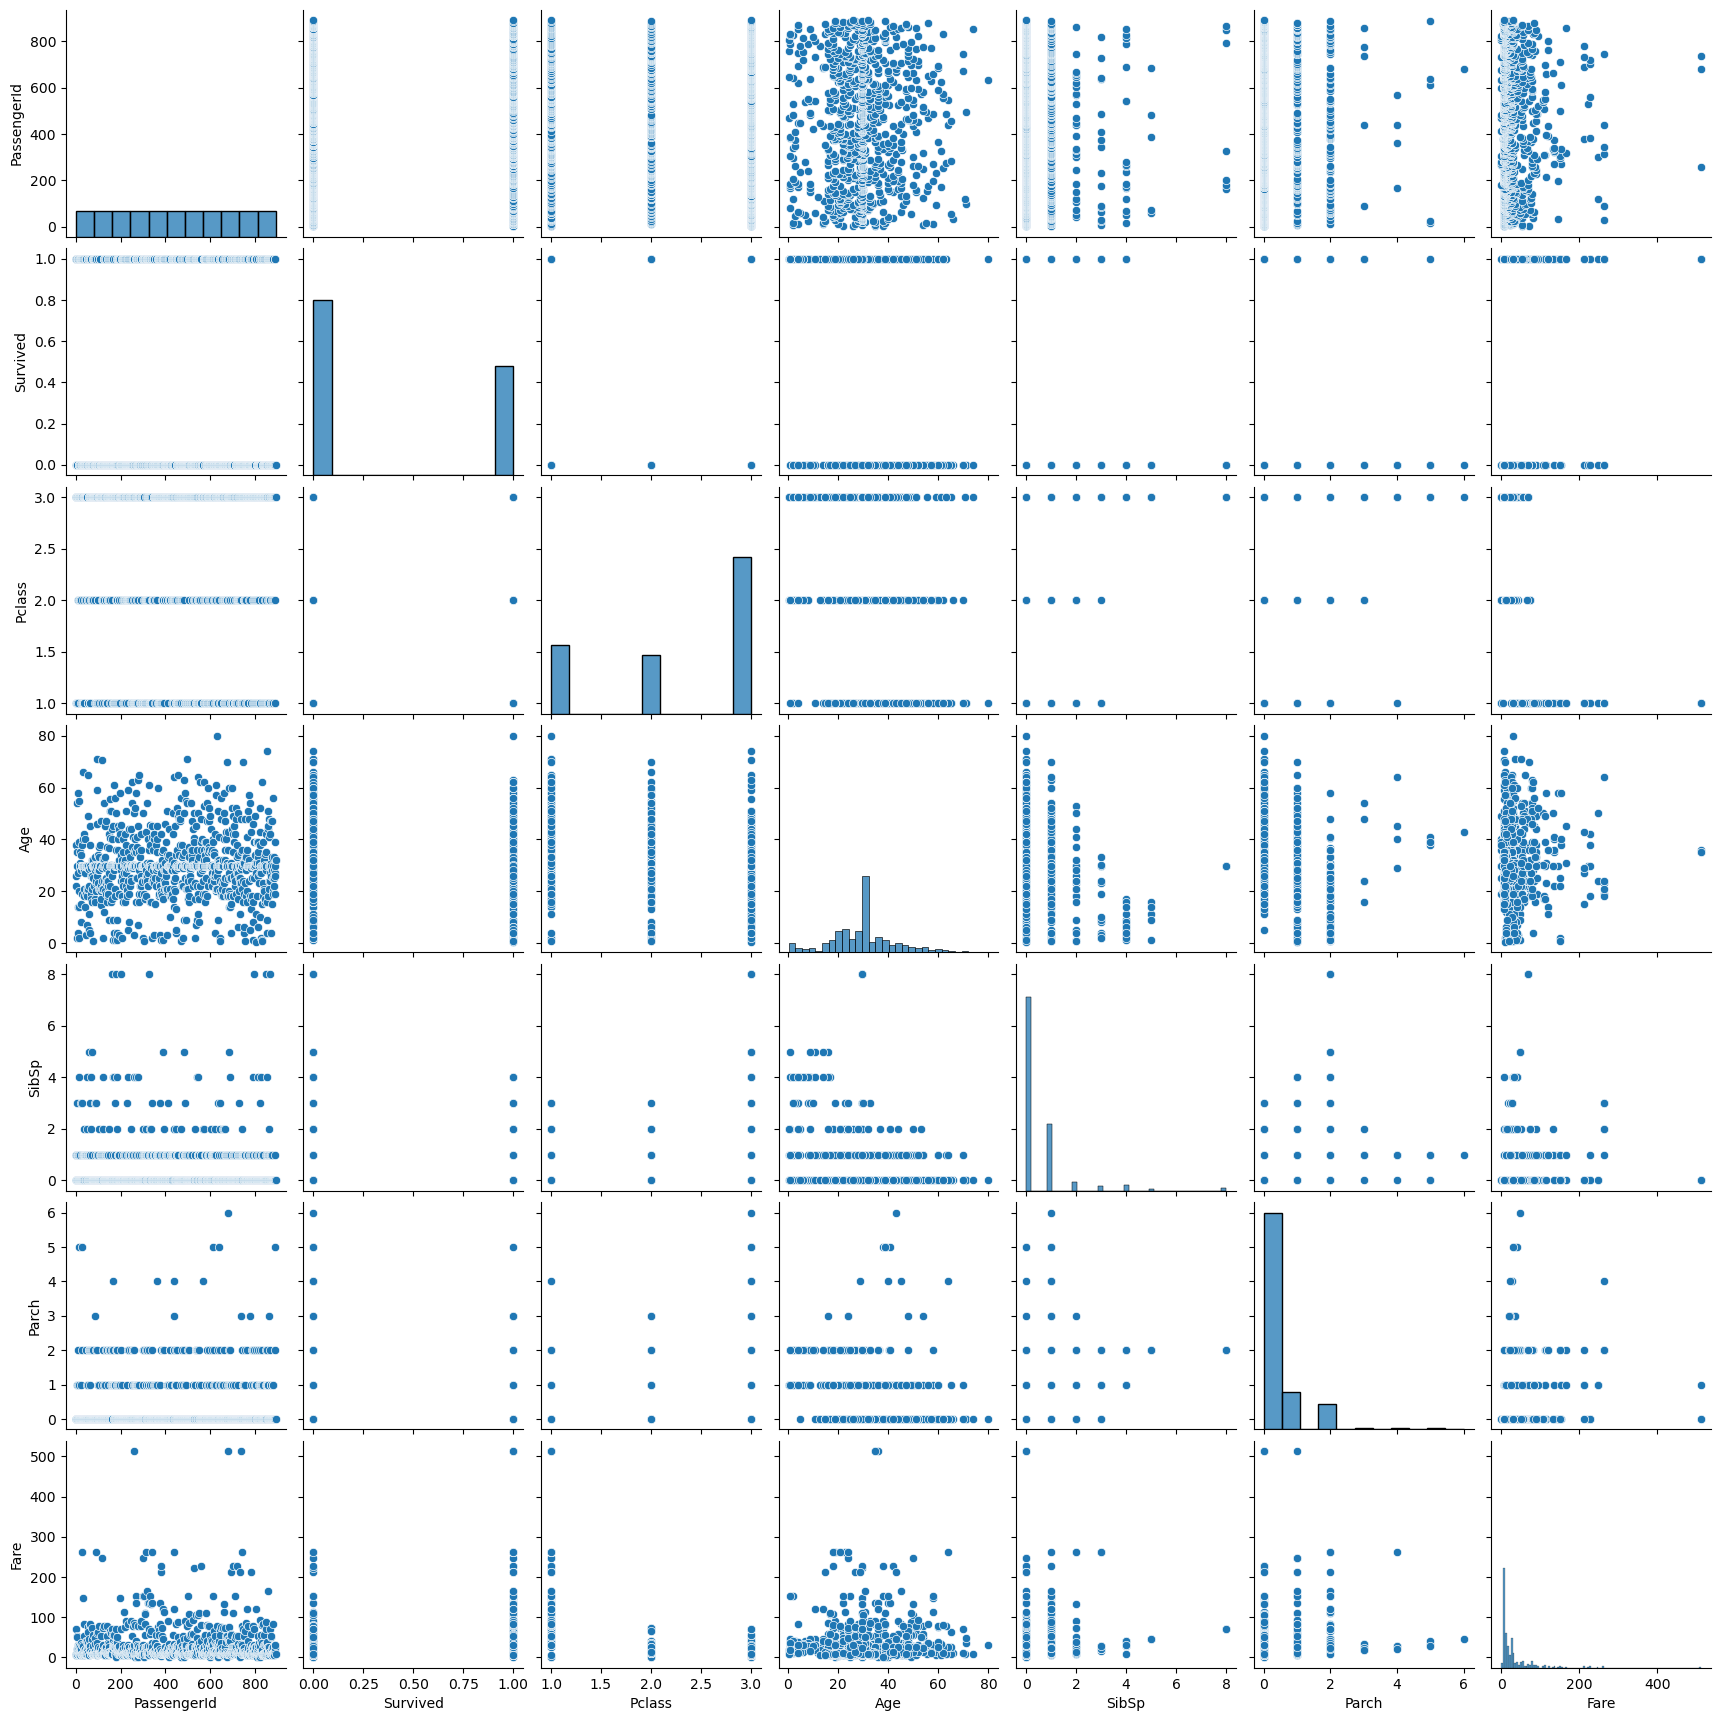

In [24]:
sns.pairplot(data=df,dropna=True)

data visualisation

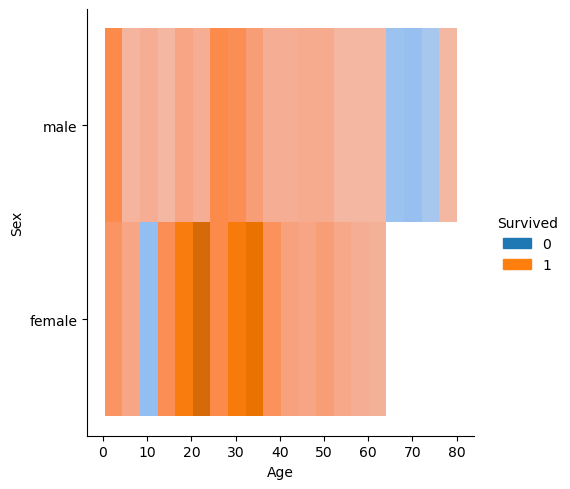

In [38]:
sns.displot(data=df,x='Age',y='Sex',hue='Survived')

<Axes: xlabel='Sex', ylabel='Age'>

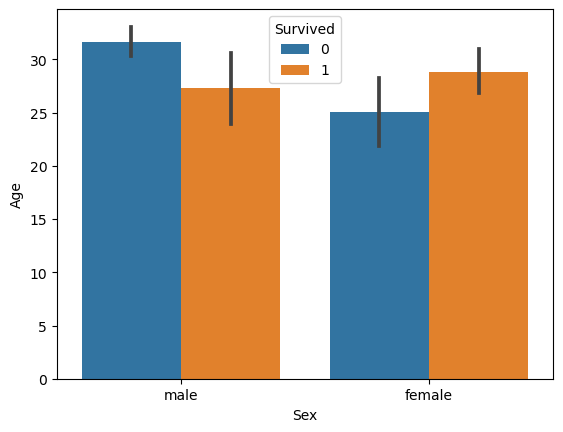

In [39]:
sns.barplot(df,x='Sex',y='Age',hue='Survived')

In [46]:
p=df.corr()
p

C:\Users\K RISHITHA\AppData\Local\Temp\ipykernel_15040\1152118099.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p=df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,0.005167,0.002589
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.147408,0.190897
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,-0.027526,-0.433840
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.280626,0.067941
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.462241,0.262800
Parch,0.005167,0.147408,-0.027526,-0.280626,0.462241,1.000000,0.312600
Fare,0.002589,0.190897,-0.433840,0.067941,0.262800,0.312600,1.000000


<Axes: >

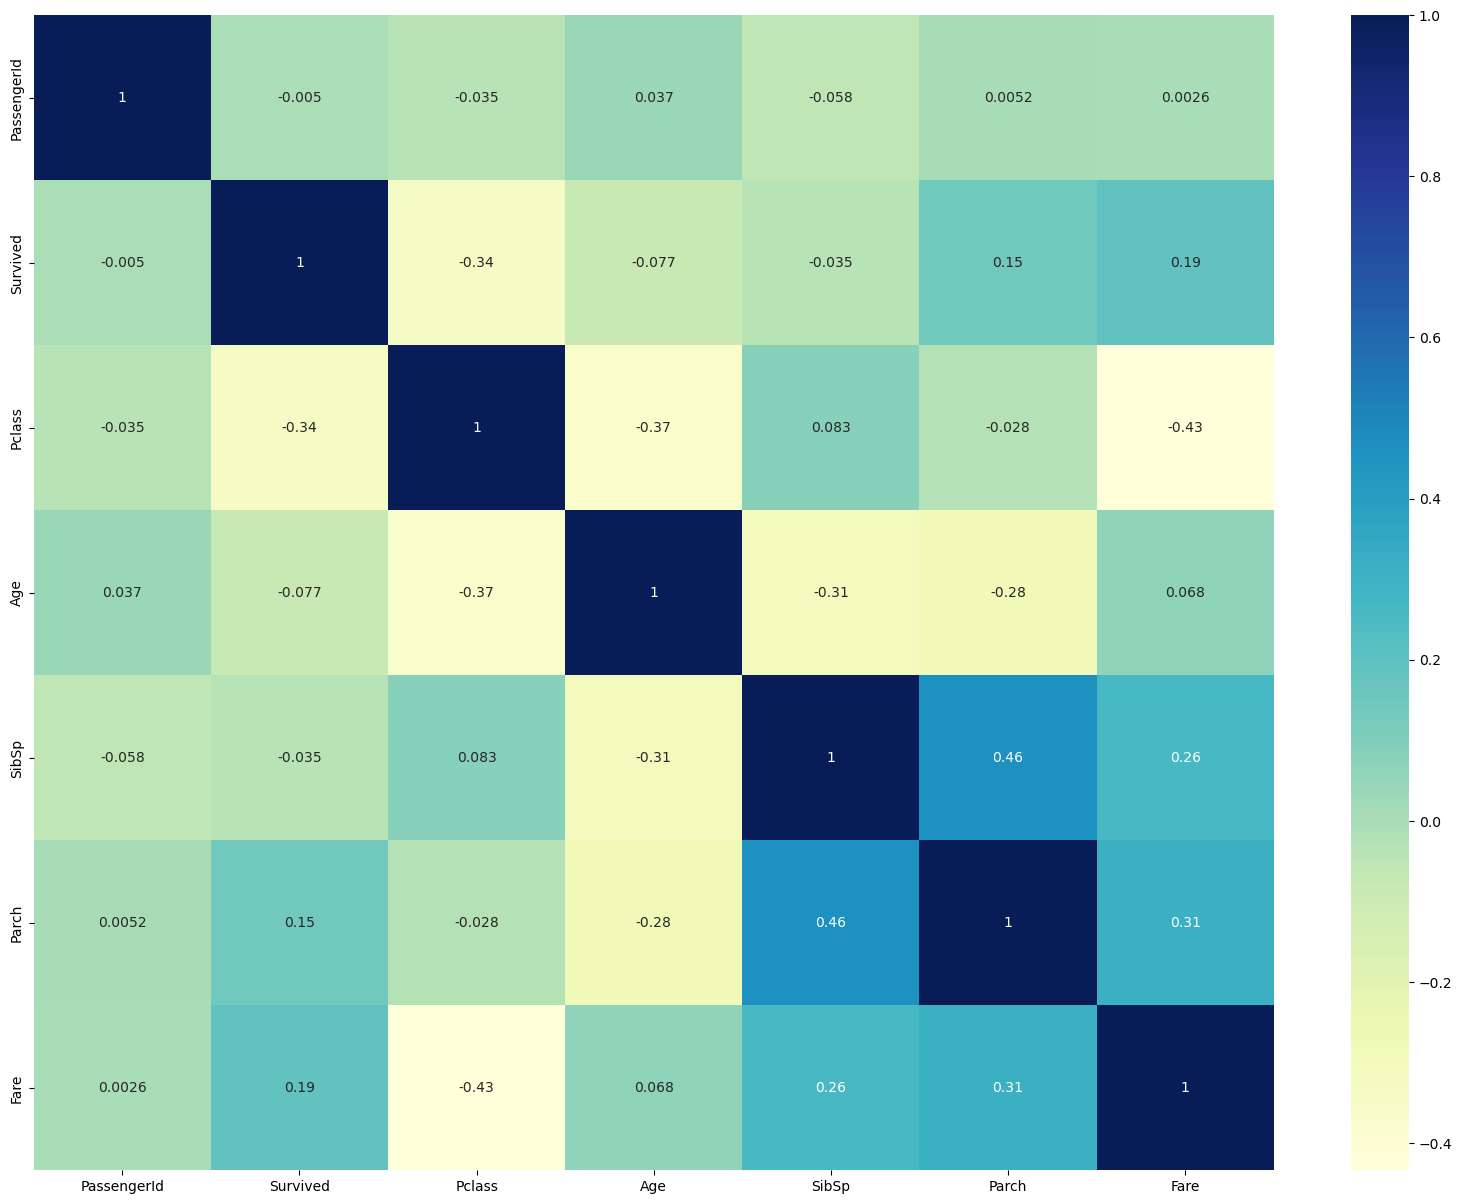

In [47]:
plt.subplots(figsize=(20,15))
sns.heatmap(p,annot=True,cmap="YlGnBu")

# 4.outliers detection

<Axes: >

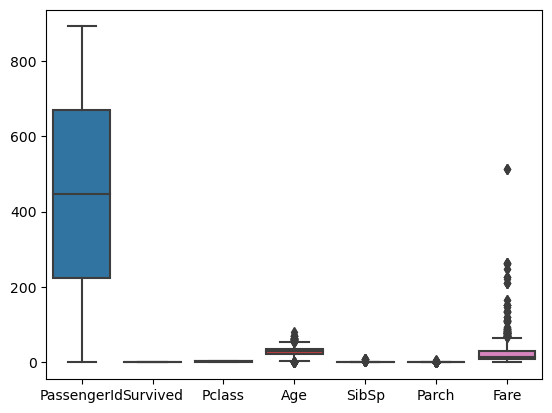

In [68]:
sns.boxplot(df)

In [79]:
# from above graph we found that age,sibsp,parch,fare are having outliers so since we have less data in dataset we use IQR method for removal of outliers

<Axes: >

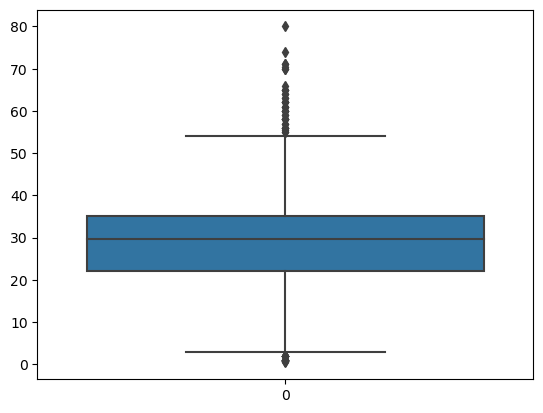

In [69]:
sns.boxplot(df.Age)

In [80]:
#it has outliers above upper limit and below lower limit we remove with IQR method

In [70]:
q1= df.Age.quantile(0.25)# finding q1 formula
q3= df.Age.quantile(0.75)# finding q3 formula

In [71]:
IQR = q3-q1 
IQR 

13.0

In [72]:
uuper_limit = q3+1.5*(IQR)
uuper_limit

54.5

In [73]:
lower_limit= q1- 1.5*IQR
lower_limit

2.5

In [74]:
df.median()

C:\Users\K RISHITHA\AppData\Local\Temp\ipykernel_15040\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


PassengerId    446.000000
Survived         0.000000
Pclass           3.000000
Age             29.699118
SibSp            0.000000
Parch            0.000000
Fare            14.454200
dtype: float64

In [75]:
df=df[df.Age<uuper_limit]

In [76]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 849, dtype: float64

<Axes: >

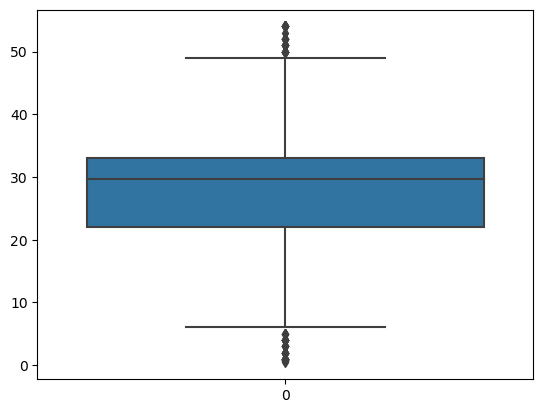

In [77]:
sns.boxplot(df['Age'])

In [78]:
df.shape

(849, 12)

<Axes: >

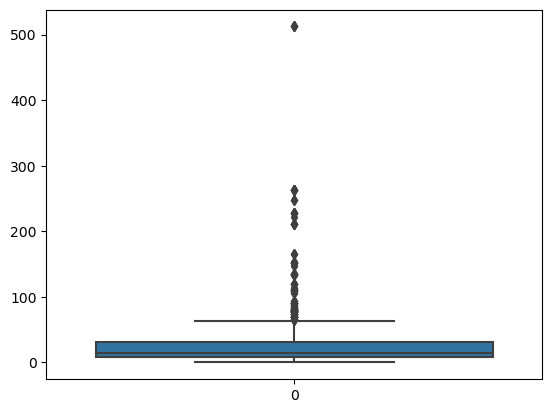

In [79]:
sns.boxplot(df.Fare)


In [22]:
q1= df.Fare.quantile(0.25)# finding q1 formula
q3= df.Fare.quantile(0.75)# finding q3 formula

In [80]:
q1

22.0

In [81]:
q3

35.0

In [82]:
IQR = q3-q1 
IQR 

13.0

In [83]:
uuper_limit = q3+1.5*(IQR)
uuper_limit

54.5

In [84]:
df['Fare']=np.where(df['Fare']>uuper_limit,14.45,df['Fare'])


<Axes: >

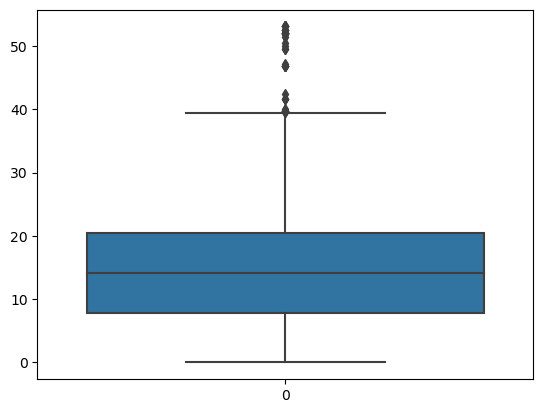

In [85]:
sns.boxplot(df.Fare)

In [48]:
df.shape

(849, 12)

<Axes: >

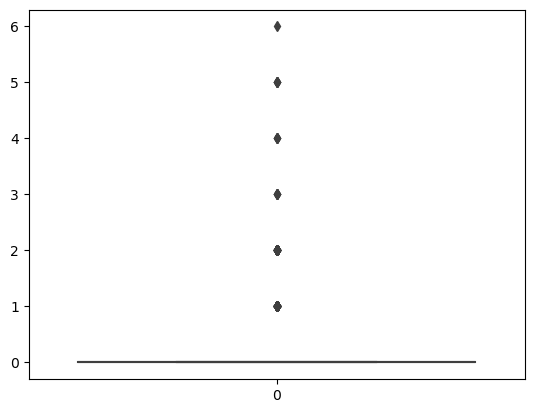

In [29]:
sns.boxplot(df['Parch'])

In [86]:
q1= df.Parch.quantile(0.25)# finding q1 formula
q3= df.Parch.quantile(0.75)# finding q3 formula

0.0

In [34]:
IQR = q3-q1 
IQR 

0.0

In [35]:
uuper_limit = q3+1.5*(IQR)
uuper_limit

0.0

In [36]:
df['Parch']=np.where(df['Parch']>uuper_limit,14.45,df['Parch'])


<Axes: >

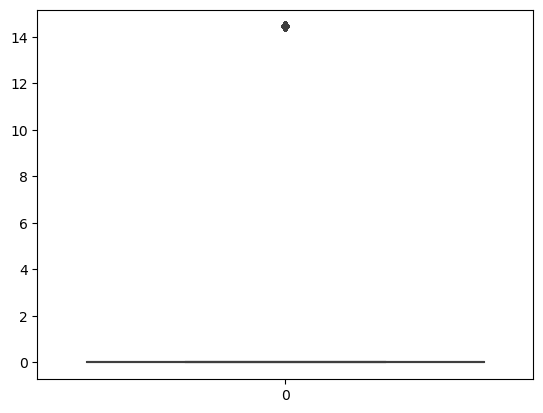

In [37]:
sns.boxplot(df.Parch)

In [ ]:
 Parch,SibSp are similar type they are having q1,q2,q3 upper limit as 0 so we no need to consider

# 5.Splitting Dependent and Independent variables

In [81]:
#splitting dependent and independent variables. the dependent variable is target value "Embarked". we 
#divide the depedent and indepedent variables using matrics 

In [55]:
x=df.iloc[:,3:13]
x

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250,B96 B98,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,14.450,C85,C
2,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925,B96 B98,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100,C123,S
4,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050,B96 B98,S
...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000,B96 B98,S
887,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.000,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.450,B96 B98,S
889,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000,C148,C


In [56]:
y=df.iloc[:,13:14]
y

""
0
1
2
3
4
...
886
887
888
889


In [57]:
x.shape

(849, 9)

In [58]:
y.shape

(849, 0)

# 6.Encoding

In [ ]:
our data contains categorical values in order to convert them to numerical 
we use ordinal encoding method(label encoding) --->take care of rank of data 


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
df["Sex"]=le.fit_transform(df["Sex"])

C:\Users\K RISHITHA\AppData\Local\Temp\ipykernel_5912\3278906472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"]=le.fit_transform(df["Sex"])


In [61]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,B96 B98
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,14.450,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,B96 B98
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,B96 B98


In [62]:
print(le.classes_)

['female' 'male']


In [63]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))
mapping

{'female': 0, 'male': 1}

# 7. Feature Scaling

inorder normalizing the range of features in a dataset we use min max scaler 

In [82]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()

In [84]:
#x_train=sc.fit_transform(x_train)
#x_test=sc.fit_transform(x_test)
#df_new = pd.DataFrame(sc.fit_transform(df), columns=df.columns)  #fit and transforming StandardScaler the dataframe 

In [91]:
#df_new

In [65]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [66]:
df.drop("Name",axis=1,inplace=True)

C:\Users\K RISHITHA\AppData\Local\Temp\ipykernel_5912\2262618141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Name",axis=1,inplace=True)


In [67]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,A/5 21171,7.250,B96 B98,S
1,2,1,1,0,38.000000,1,0,PC 17599,14.450,C85,C
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.925,B96 B98,S
3,4,1,1,0,35.000000,1,0,113803,53.100,C123,S
4,5,0,3,1,35.000000,0,0,373450,8.050,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536,13.000,B96 B98,S
887,888,1,1,0,19.000000,0,0,112053,30.000,B42,S
888,889,0,3,0,29.699118,1,2,W./C. 6607,23.450,B96 B98,S
889,890,1,1,1,26.000000,0,0,111369,30.000,C148,C


In [68]:
df.drop("Ticket",axis=1,inplace=True)

C:\Users\K RISHITHA\AppData\Local\Temp\ipykernel_5912\1630007375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Ticket",axis=1,inplace=True)


In [69]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,7.250,B96 B98,S
1,2,1,1,0,38.000000,1,0,14.450,C85,C
2,3,1,3,0,26.000000,0,0,7.925,B96 B98,S
3,4,1,1,0,35.000000,1,0,53.100,C123,S
4,5,0,3,1,35.000000,0,0,8.050,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.000,B96 B98,S
887,888,1,1,0,19.000000,0,0,30.000,B42,S
888,889,0,3,0,29.699118,1,2,23.450,B96 B98,S
889,890,1,1,1,26.000000,0,0,30.000,C148,C


In [70]:
df.drop("Cabin",axis=1,inplace=True)

C:\Users\K RISHITHA\AppData\Local\Temp\ipykernel_5912\731543653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Cabin",axis=1,inplace=True)


In [71]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.250,S
1,2,1,1,0,38.000000,1,0,14.450,C
2,3,1,3,0,26.000000,0,0,7.925,S
3,4,1,1,0,35.000000,1,0,53.100,S
4,5,0,3,1,35.000000,0,0,8.050,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.000,S
887,888,1,1,0,19.000000,0,0,30.000,S
888,889,0,3,0,29.699118,1,2,23.450,S
889,890,1,1,1,26.000000,0,0,30.000,C


In [72]:
df.drop("Embarked",axis=1,inplace=True)

C:\Users\K RISHITHA\AppData\Local\Temp\ipykernel_5912\366501260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Embarked",axis=1,inplace=True)


In [73]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.250
1,2,1,1,0,38.000000,1,0,14.450
2,3,1,3,0,26.000000,0,0,7.925
3,4,1,1,0,35.000000,1,0,53.100
4,5,0,3,1,35.000000,0,0,8.050
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.000
887,888,1,1,0,19.000000,0,0,30.000
888,889,0,3,0,29.699118,1,2,23.450
889,890,1,1,1,26.000000,0,0,30.000


In [74]:
df_Scaled =pd.DataFrame(ms.fit_transform(df),columns=df.columns)


In [75]:
df_Scaled.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.000000,0.0,1.0,1.0,0.402762,0.125,0.0,0.114429
1,0.001124,1.0,0.0,0.0,0.701381,0.125,0.0,0.228068
2,0.002247,1.0,1.0,0.0,0.477417,0.000,0.0,0.125082
3,0.003371,1.0,0.0,0.0,0.645390,0.125,0.0,0.838091
4,0.004494,0.0,1.0,1.0,0.645390,0.000,0.0,0.127055


# 8. Splitting Data into Train and Test

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [78]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((594, 9), (255, 9), (594, 0), (255, 0))